# Evaluation project-Temperature prediction

In [306]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [307]:
df=pd.read_csv("temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


two target variables

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [308]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# Understanding the Datasets

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

# Checking the null values

In [309]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [310]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [311]:
df=df.drop(['Date'],axis=1)
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [312]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

station             0.025800
Present_Tmax        0.902993
Present_Tmin        0.902993
LDAPS_RHmin         0.967492
LDAPS_RHmax         0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_WS            0.967492
LDAPS_LH            0.967492
LDAPS_CC1           0.967492
LDAPS_CC2           0.967492
LDAPS_CC3           0.967492
LDAPS_CC4           0.967492
LDAPS_PPT1          0.967492
LDAPS_PPT2          0.967492
LDAPS_PPT3          0.967492
LDAPS_PPT4          0.967492
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
Next_Tmax           0.348297
Next_Tmin           0.348297
dtype: float64

# Checking unique values

In [313]:
df['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

In [314]:
df['Present_Tmax'].unique()

array([28.7, 31.9, 31.6, 32. , 31.4, 32.1, 31.7, 31.3, 32.5, 30.7, 32.8,
       30.9, 32.2, 32.7, 31.5, 28.3, 30.5, 30.3, 31. , 30.8, 30. , 30.6,
       30.1, 29.9, 31.8, 24.4, 27. , 28. , 27.7, 27.8, 28.8, 27.6, 26.9,
       27.5, 28.6, 26.2, 28.4, 26.7, 29. , 26.6, 27.1, 28.1, 27.9, 28.5,
       30.4, 29.1, 28.9, 29.4, 31.1, 29.5, 29.6, 24.9, 28.2, 26.1, 27.2,
       26.5, 27.4, 30.2, 32.4, 29.3, 29.8, 33.5, 29.2, 29.7, 25.9, 23.1,
       24.8, 26.3, 26.8, 25.8, 25.3, 25.1, 24.5, 25.4, 26. , 25.6, 26.4,
        nan, 27.3, 25.2, 23.3, 25.7, 25. , 25.5, 22.4, 24.6, 24.2, 24.7,
       24.3, 23.6, 24.1, 23. , 23.7, 23.8, 22.9, 24. , 22.7, 31.2, 32.6,
       32.9, 33.2, 33.6, 33.4, 33.9, 32.3, 33.1, 33. , 34. , 33.3, 34.7,
       34.3, 34.1, 33.8, 33.7, 35.2, 34.9, 34.2, 34.8, 35.5, 34.5, 34.4,
       35.1, 21.2, 23.4, 23.2, 23.9, 23.5, 35.7, 34.6, 22.5, 21.7, 22.8,
       35.9, 35.3, 20.6, 21.9, 22.2, 20.4, 22. , 35. , 36.5, 35.4, 35.6,
       21.4, 21.6, 22.1, 22.6, 37.5, 20.7, 21.5, 36

In [315]:
df['Present_Tmin'].unique()

array([21.4, 21.6, 23.3, 23.4, 21.9, 23.5, 24.4, 23.6, 22. , 20.5, 22.2,
       23.8, 20.1, 22.8, 23.9, 25. , 24.2, 21.2, 22.9, 24.5, 22.6, 24.1,
       23.1, 21.7, 21.1, 24.8, 23.2, 24.3, 24. , 20.6, 22.4, 22.5, 23. ,
       22.1, 22.3, 17.9, 20.4, 20.8, 20.9, 19.5, 19.3, 21.3, 18.9, 20.3,
       19.8, 19. , 19.6, 20.7, 21.5, 24.6, 23.7, 19.9, 21.8, 20.2, 22.7,
        nan, 24.9, 25.1, 24.7, 25.2, 25.6, 26. , 26.1, 26.2, 25.7, 25.8,
       25.3, 25.4, 26.6, 26.7, 26.5, 25.5, 26.3, 26.4, 25.9, 27.2, 27.1,
       26.8, 26.9, 27. , 27.6, 27.5, 27.3, 27.4, 27.8, 27.7, 28.3, 28. ,
       28.1, 28.4, 21. , 20. , 19.7, 19.4, 18.8, 18.5, 18.6, 18.4, 18.7,
       19.1, 18. , 17.7, 16.5, 18.2, 19.2, 16.7, 18.1, 27.9, 28.5, 29.6,
       28.9, 29.2, 28.6, 28.8, 28.2, 29.9, 29.7, 29.1, 17.6, 17. , 16.8,
       18.3, 16.9, 17.5, 16.4, 17.2, 17.4, 16.1, 17.3, 17.8, 15.5, 15.6,
       15.3, 14.3, 15.8, 16.6, 15.4, 28.7, 16.2, 13.5, 14.8, 15.1, 11.3,
       17.1, 14.2, 13.6, 15.2, 15.9, 14.4, 29. , 16

In [316]:
df['LDAPS_RHmin'].unique()

array([58.25568771, 52.26339722, 48.69047928, ..., 26.74131012,
       24.04063416, 22.93301392])

In [317]:
df['LDAPS_RHmax'].unique()

array([91.11636353, 90.60472107, 83.97358704, ..., 78.86985779,
       77.29497528, 77.2437439 ])

In [318]:
df['LDAPS_Tmax_lapse'].unique()

array([28.07410146, 29.85068856, 30.09129171, ..., 26.35208148,
       27.01019337, 27.93951572])

In [319]:
df['LDAPS_Tmin_lapse'].unique()

array([23.00693617, 24.03500932, 24.56563342, ..., 18.77567834,
       18.73351887, 18.52296541])

In [320]:
df['LDAPS_WS'].unique()

array([6.81888697, 5.69188993, 6.13822368, ..., 6.14891751, 6.542819  ,
       7.28926362])

In [321]:
df['LDAPS_LH'].unique()

array([69.45180527, 51.93744783, 20.57304966, ..., 72.05829446,
       47.24145703,  9.09003441])

In [322]:
df['LDAPS_CC1'].unique()

array([0.23394747, 0.2255082 , 0.20934366, ..., 0.03003418, 0.03587383,
       0.04895354])

In [323]:
df['LDAPS_CC2'].unique()

array([0.20389571, 0.25177137, 0.25746945, ..., 0.08103502, 0.07496236,
       0.0598686 ])

In [324]:
df['LDAPS_CC3'].unique()

array([1.61696854e-01, 1.59444059e-01, 2.04091465e-01, ...,
       2.37000000e-05, 7.86000000e-05, 5.85000000e-07])

In [325]:
df['LDAPS_CC4'].unique()

array([0.1309282 , 0.12772726, 0.14212525, ..., 0.00437995, 0.01767779,
       0.00079615])

In [326]:
df['LDAPS_PPT1'].unique()

array([0.        , 0.80422247, 0.46474446, ..., 3.45615864, 2.20858192,
       2.04050223])

In [327]:
df['LDAPS_PPT2'].unique()

array([ 0.        ,  9.93311109, 11.83342134, ...,  0.29865928,
        0.30087843,  0.24799708])

In [328]:
df['LDAPS_PPT3'].unique()

array([0.        , 0.23700432, 0.25371913, ..., 0.09810387, 0.02972079,
       0.02102984])

In [329]:
df['LDAPS_PPT4'].unique()

array([0.        , 0.84808154, 1.51387392, ..., 3.57477919, 3.34314185,
       3.09381549])

In [330]:
df['Next_Tmax'].unique()

array([29.1, 30.5, 31.1, 31.7, 31.2, 31.5, 30.9, 31.3, 32.6, 31.4, 30.8,
       33.1, 31.8, 30.6, 32. , 24.8, 27.3, 28.1, 27.9, 28.2, 28.9, 27.6,
       27.1, 27.5, 26.8, 28.7, 27.8, 29.2, 28.8, 30. , 30.1, 29.4, 31.6,
       30.2, 30.4, 32.5, 31. , 25.2, 28.4, 28.3, 27.4, 26.2, 28. , 26.7,
       28.6, 27.7, 28.5, 30.7, 29.6, 29.9, 29.3, 32.2, 33.6, 30.3, 32.3,
       29.8, 29.7, 29.5, 29. , 23.4, 26.4, 26.6, 26.1, 25.4, 27.2, 27. ,
       26.3, 25.5, 25.6, 25.9, 23. , 26.5, 26. , 25.7, 22.4, 25.8, 25.1,
       24.9, 24.3, 24.5, 25.3, 21.8, 24.7, 25. , 24.6, 23.6, 24.1, 23.2,
       23.7, 24.2, 23.8, 23.9, 31.9, 23.1, 33. , 32.7, 26.9, 32.1, 33.3,
       32.4, 33.4, 33.5, 34.8, 34. , 34.3, 34.5,  nan, 32.8, 33.7, 33.2,
       32.9, 34.1, 34.9, 35.3, 34.6, 35. , 33.9, 34.7, 36.6, 34.4, 35.8,
       35.2, 33.8, 35.6, 35.1, 34.2, 36. , 35.5, 35.4, 21.6, 23.5, 24.4,
       24. , 35.9, 36.1, 22.5, 22.8, 36.2, 21.1, 23.3, 22. , 22.7, 20.9,
       22.2, 22.1, 37. , 36.9, 22.9, 35.7, 37.1, 22

In [331]:
df['Next_Tmin'].unique()

array([21.2, 22.5, 23.9, 24.3, 24. , 23.4, 22.9, 21.6, 21. , 24.5, 22.2,
       22.8, 20.9, 21.1, 23. , 23.7, 23.2, 24.2, 18.7, 21.5, 21.8, 22.3,
       21.3, 20.7, 19.8, 20.8, 21.7, 22.1, 20.5, 21.9, 17.8, 20.1, 20.3,
       19.4, 19.1, 18.9, 20. , 19.7, 19.5, 20.6, 23.1, 23.3, 22.7, 22.6,
       22.4, 22. , 23.5, 23.8, 21.4, 19.3, 20.4, 19.9, 20.2, 24.1, 23.6,
       24.4, 24.8, 25.1, 24.6, 24.7, 25. , 24.9, 25.3, 26. , 26.1, 25.5,
       25.8, 25.4, 25.6, 25.7, 25.2, 25.9, 26.3, 26.2, 26.4, 26.5, 26.9,
        nan, 26.8, 26.6, 27. , 27.1, 26.7, 27.5, 27.2, 27.4, 27.7, 28.3,
       27.6, 28. , 27.3, 19.6, 19.2, 18.6, 18.5, 18.2, 18.4, 18.8, 17.9,
       17.5, 16.5, 18. , 19. , 16.7, 18.1, 18.3, 28.1, 28.4, 29.4, 29.1,
       28.5, 28.8, 29.8, 29.5, 28.6, 17.1, 16.8, 17.6, 17.4, 15.8, 16.9,
       17.7, 17.2, 15.5, 16.6, 16.4, 16.3, 17. , 14.7, 15.9, 16. , 17.3,
       15.4, 15.3, 13.8, 15.6, 15.1, 27.9, 28.7, 27.8, 28.2, 13.3, 14.1,
       15. , 11.3, 13.4, 15.7, 14.9, 16.2, 14.4, 16

Handling the Nan values and replacing it with mean of the column. As the column is countinous in nature

In [332]:
import numpy as np

df['station']=df['station'].fillna(np.mean(df['station']))
df['Present_Tmax']=df['Present_Tmax'].fillna(np.mean(df['Present_Tmax']))
df['Present_Tmin']=df['Present_Tmin'].fillna(np.mean(df['Present_Tmin']))
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(np.mean(df['LDAPS_RHmin']))
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(np.mean(df['LDAPS_RHmax']))
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(np.mean(df['LDAPS_Tmax_lapse']))
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(np.mean(df['LDAPS_Tmin_lapse']))

df['LDAPS_WS']=df['LDAPS_WS'].fillna(np.mean(df['LDAPS_WS']))
df['LDAPS_LH']=df['LDAPS_LH'].fillna(np.mean(df['LDAPS_LH']))
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(np.mean(df['LDAPS_CC1']))
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(np.mean(df['LDAPS_CC2']))
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(np.mean(df['LDAPS_CC3']))
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(np.mean(df['LDAPS_CC4']))
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(np.mean(df['LDAPS_PPT1']))
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(np.mean(df['LDAPS_PPT2']))
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(np.mean(df['LDAPS_PPT3']))
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(np.mean(df['LDAPS_PPT4']))
df['Next_Tmax']=df['Next_Tmax'].fillna(np.mean(df['Next_Tmax']))
df['Next_Tmin']=df['Next_Tmin'].fillna(np.mean(df['Next_Tmin']))

df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [333]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [334]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

# Data Visualization

<AxesSubplot:xlabel='station', ylabel='Density'>

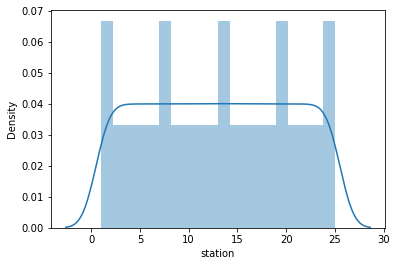

In [335]:
import seaborn as sns

sns.distplot(df['station'],kde=True)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

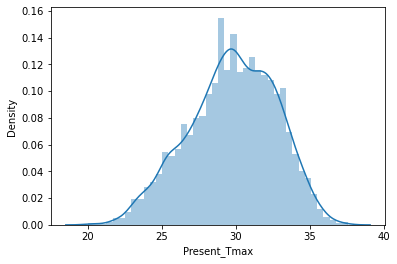

In [336]:
sns.distplot(df['Present_Tmax'],kde=True)

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

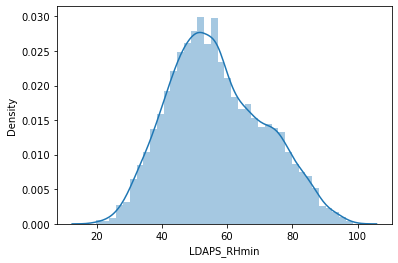

In [337]:
sns.distplot(df['LDAPS_RHmin'],kde=True)

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

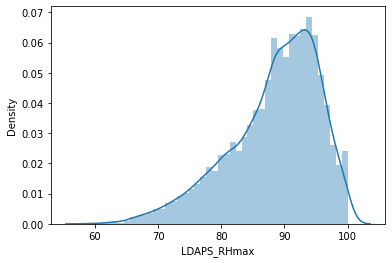

In [338]:
sns.distplot(df['LDAPS_RHmax'],kde=True)

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

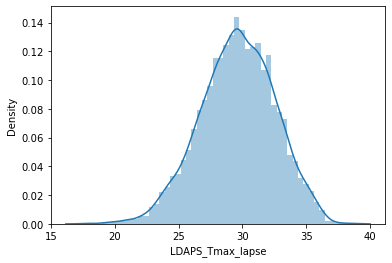

In [339]:
sns.distplot(df['LDAPS_Tmax_lapse'],kde=True)

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

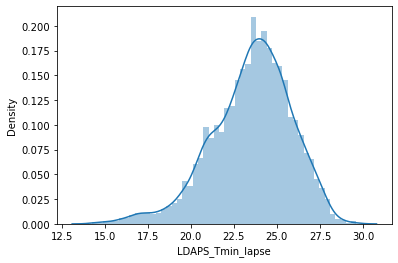

In [340]:
sns.distplot(df['LDAPS_Tmin_lapse'],kde=True)

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

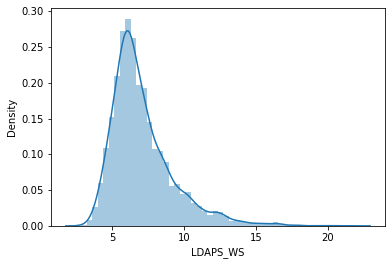

In [341]:
sns.distplot(df['LDAPS_WS'],kde=True)

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

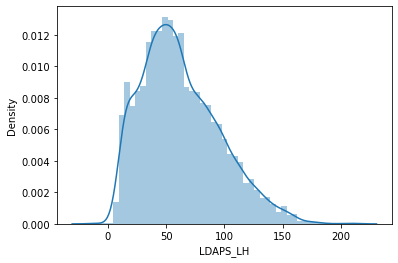

In [342]:
sns.distplot(df['LDAPS_LH'],kde=True)

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Density'>

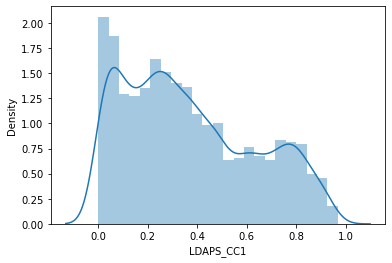

In [343]:
sns.distplot(df['LDAPS_CC1'],kde=True)

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Density'>

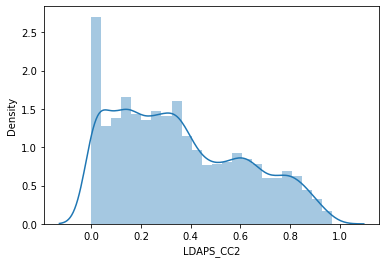

In [344]:
sns.distplot(df['LDAPS_CC2'],kde=True)

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

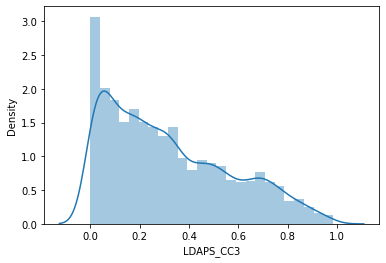

In [345]:
sns.distplot(df['LDAPS_CC3'],kde=True)

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

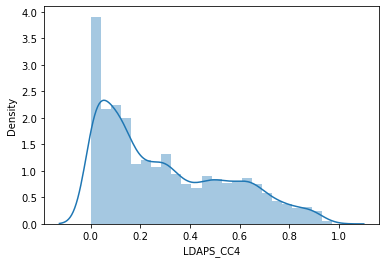

In [346]:
sns.distplot(df['LDAPS_CC4'],kde=True)

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

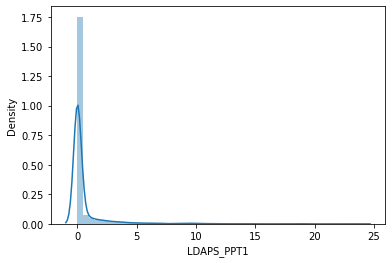

In [347]:
sns.distplot(df['LDAPS_PPT1'],kde=True)

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

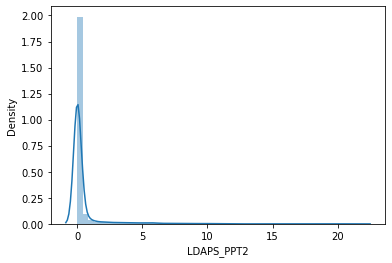

In [348]:
sns.distplot(df['LDAPS_PPT2'],kde=True)

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

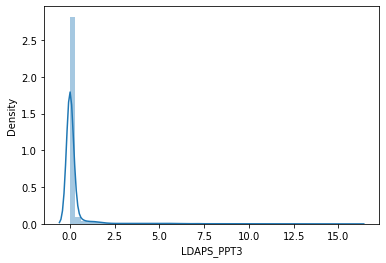

In [349]:
sns.distplot(df['LDAPS_PPT3'],kde=True)

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

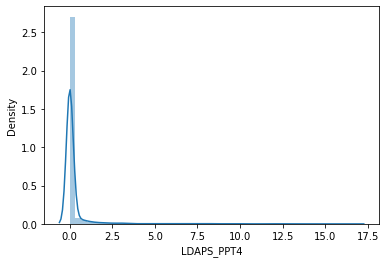

In [350]:
sns.distplot(df['LDAPS_PPT4'],kde=True)

<AxesSubplot:xlabel='lat', ylabel='Density'>

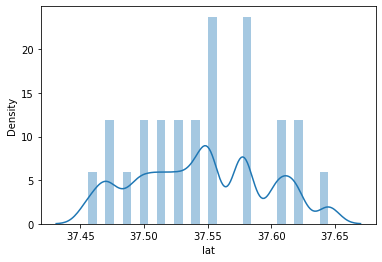

In [351]:
sns.distplot(df['lat'],kde=True)

<AxesSubplot:xlabel='lon', ylabel='Density'>

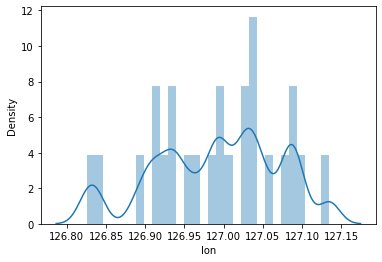

In [352]:
sns.distplot(df['lon'],kde=True)

<AxesSubplot:xlabel='DEM', ylabel='Density'>

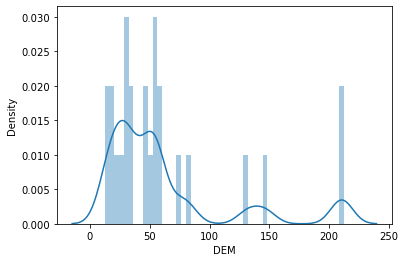

In [353]:
sns.distplot(df['DEM'],kde=True)

<AxesSubplot:xlabel='Slope', ylabel='Density'>

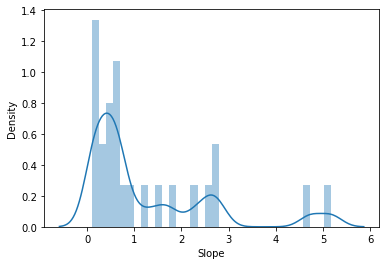

In [354]:
sns.distplot(df['Slope'],kde=True)

<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

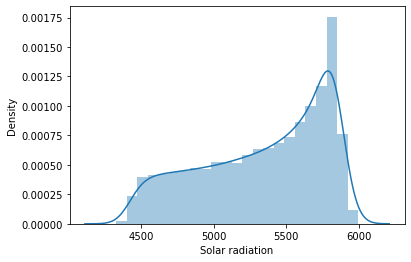

In [355]:
sns.distplot(df['Solar radiation'],kde=True)

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

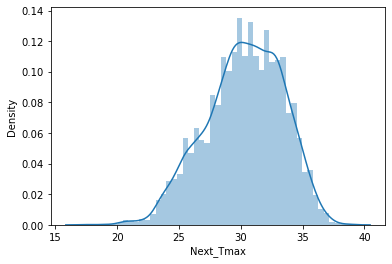

In [356]:
sns.distplot(df['Next_Tmax'],kde=True)

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

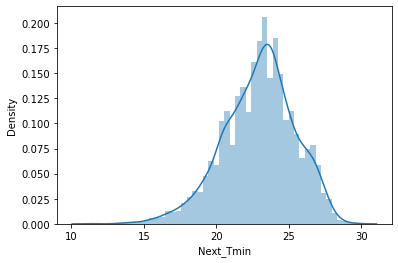

In [357]:
sns.distplot(df['Next_Tmin'],kde=True)

### Scatterplot with respect to target column  "Next_Tmax"

<AxesSubplot:xlabel='station', ylabel='Next_Tmax'>

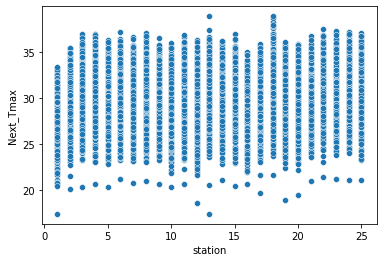

In [358]:
sns.scatterplot(x='station',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

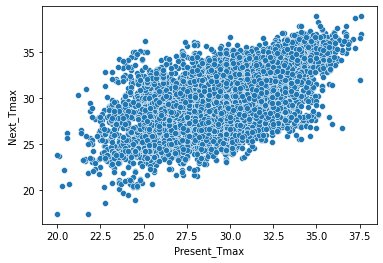

In [359]:
sns.scatterplot(x='Present_Tmax',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmax'>

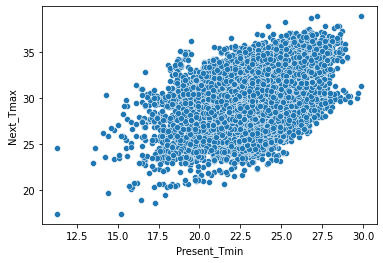

In [360]:
sns.scatterplot(x='Present_Tmin',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmax'>

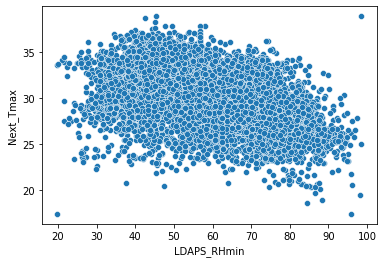

In [361]:
sns.scatterplot(x='LDAPS_RHmin',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Next_Tmax'>

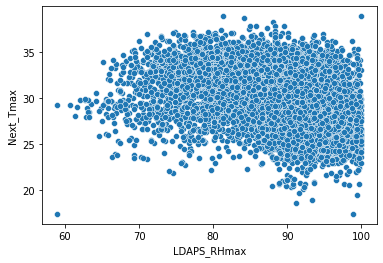

In [362]:
sns.scatterplot(x='LDAPS_RHmax',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

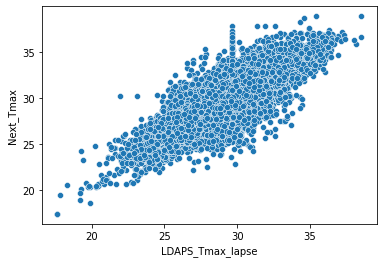

In [363]:
sns.scatterplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmax'>

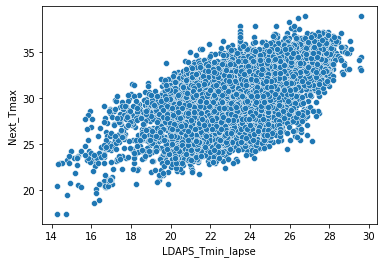

In [364]:
sns.scatterplot(x='LDAPS_Tmin_lapse',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmax'>

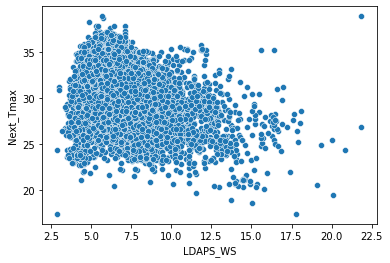

In [365]:
sns.scatterplot(x='LDAPS_WS',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmax'>

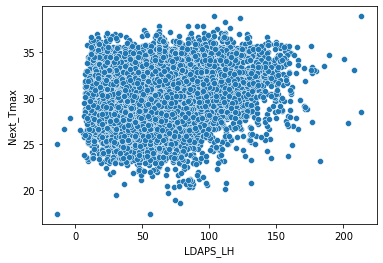

In [366]:
sns.scatterplot(x='LDAPS_LH',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmax'>

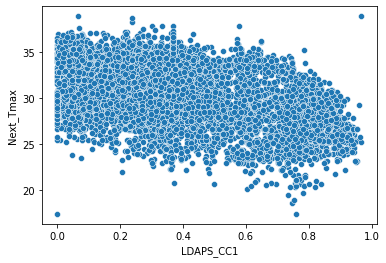

In [367]:
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Next_Tmax'>

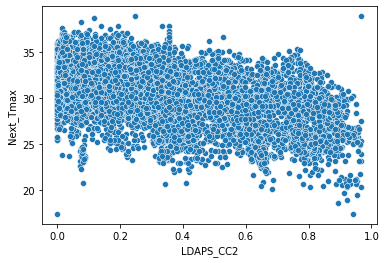

In [368]:
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Next_Tmax'>

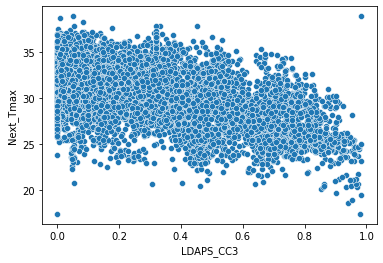

In [369]:
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmax'>

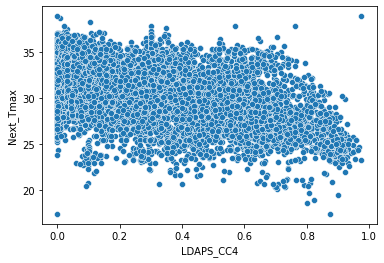

In [370]:
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Next_Tmax'>

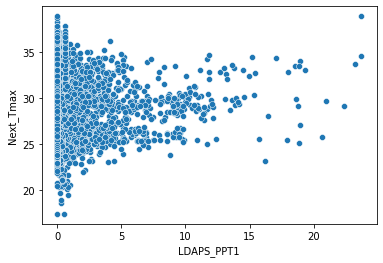

In [371]:
sns.scatterplot(x='LDAPS_PPT1',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Next_Tmax'>

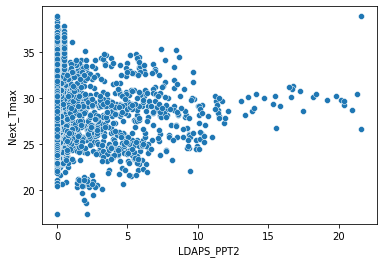

In [372]:
sns.scatterplot(x='LDAPS_PPT2',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Next_Tmax'>

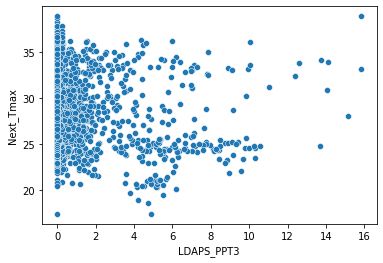

In [373]:
sns.scatterplot(x='LDAPS_PPT3',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmax'>

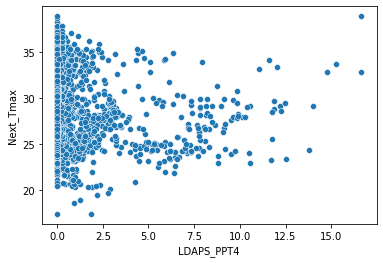

In [374]:
sns.scatterplot(x='LDAPS_PPT4',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='lat', ylabel='Next_Tmax'>

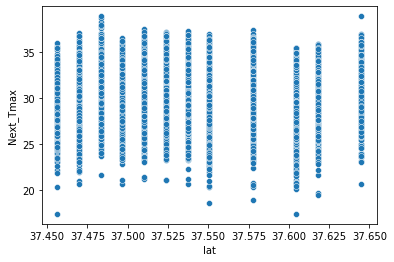

In [375]:
sns.scatterplot(x='lat',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='lon', ylabel='Next_Tmax'>

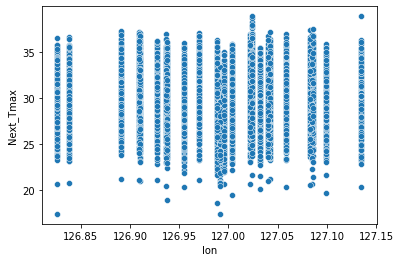

In [376]:
sns.scatterplot(x='lon',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='Slope', ylabel='Next_Tmax'>

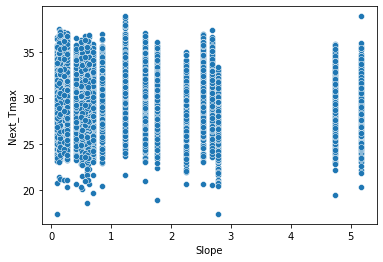

In [377]:
sns.scatterplot(x='Slope',y='Next_Tmax',data=df)  

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmax'>

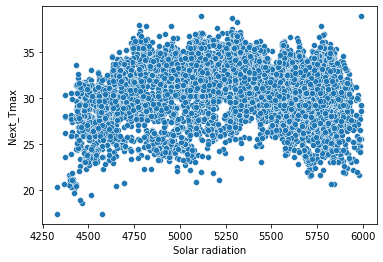

In [378]:
sns.scatterplot(x='Solar radiation',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='Next_Tmin', ylabel='Next_Tmax'>

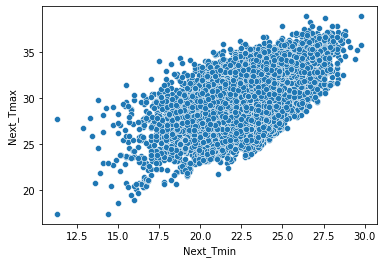

In [379]:
sns.scatterplot(x='Next_Tmin',y='Next_Tmax',data=df)

### Scatterplot with respect to target column "Next_Tmin"

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

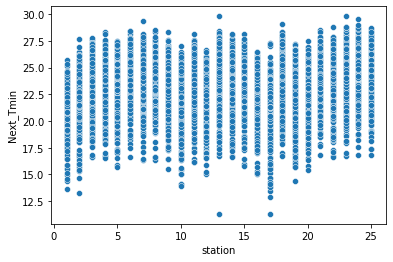

In [380]:
sns.scatterplot(x='station',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmin'>

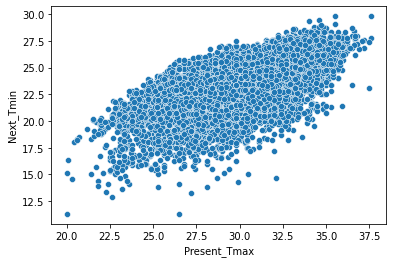

In [381]:
sns.scatterplot(x='Present_Tmax',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

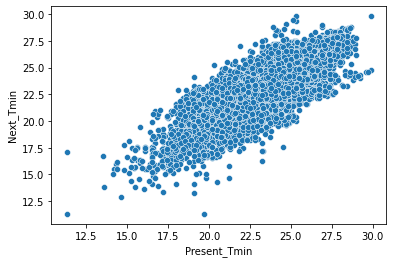

In [382]:
sns.scatterplot(x='Present_Tmin',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmin'>

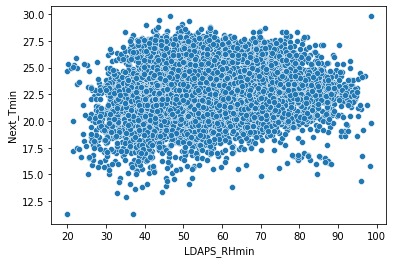

In [383]:
sns.scatterplot(x='LDAPS_RHmin',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Next_Tmin'>

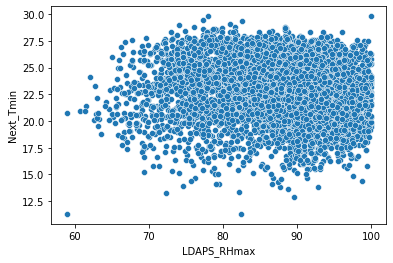

In [384]:
sns.scatterplot(x='LDAPS_RHmax',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmin'>

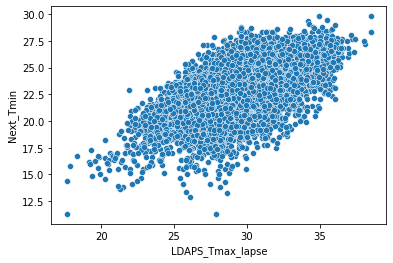

In [385]:
sns.scatterplot(x='LDAPS_Tmax_lapse',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmin'>

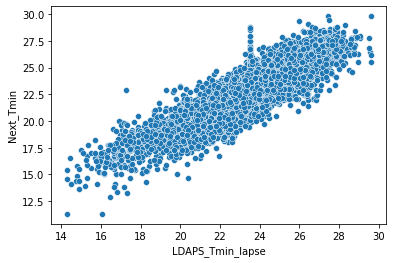

In [386]:
sns.scatterplot(x='LDAPS_Tmin_lapse',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmin'>

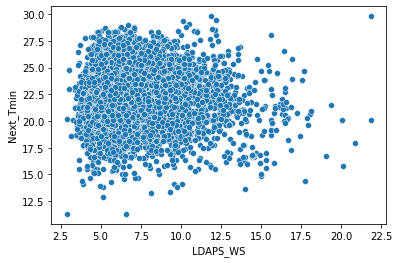

In [387]:
sns.scatterplot(x='LDAPS_WS',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmin'>

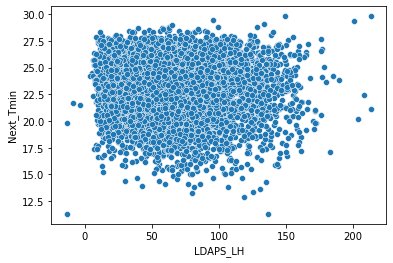

In [388]:
sns.scatterplot(x='LDAPS_LH',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Next_Tmin'>

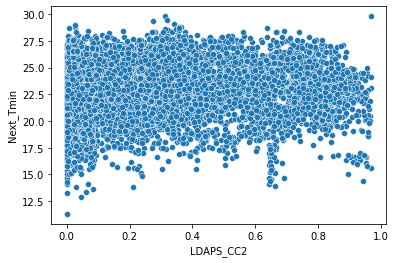

In [389]:
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Next_Tmin'>

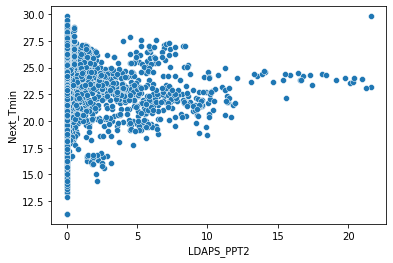

In [390]:
sns.scatterplot(x='LDAPS_PPT2',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmin'>

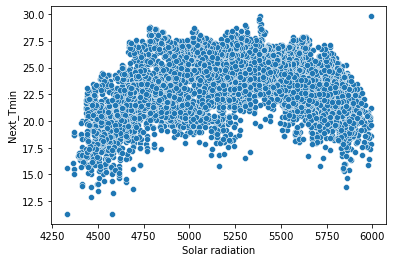

In [391]:
sns.scatterplot(x='Solar radiation',y='Next_Tmin',data=df)

Observation:
From the above observation, it is clear that the data are not normalised and we should proceed with the data cleaning method.

# Describe the data

In [392]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


<AxesSubplot:>

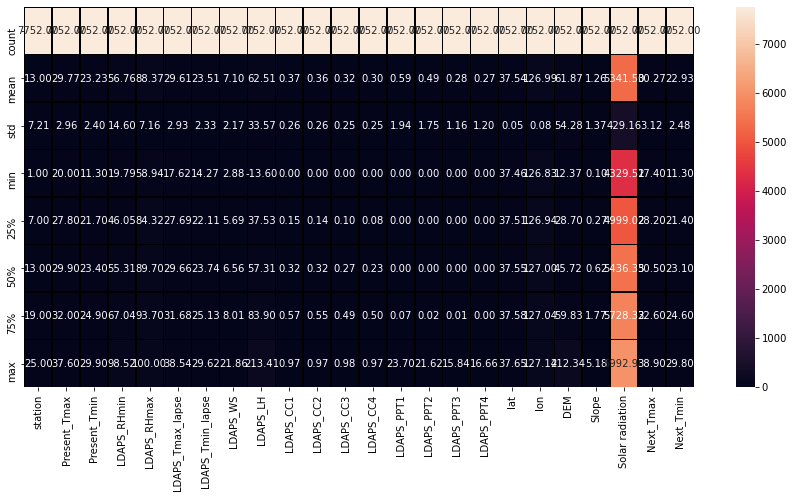

In [393]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


# Correlation

In [394]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,0.006919,...,-0.008250,-0.012461,-0.010401,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107983,0.128293
Present_Tmax,0.112655,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,...,-0.099449,-0.120367,-0.099607,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348,0.622741
Present_Tmin,0.131646,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,...,0.068176,-0.046126,-0.062965,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806,0.796670
LDAPS_RHmin,-0.066733,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.437898,0.095019
LDAPS_RHmax,-0.166984,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.195798,0.025667,0.177168,0.219599,0.149261,-0.283738,-0.071997
LDAPS_Tmax_lapse,0.069107,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189,0.586868
LDAPS_Tmin_lapse,0.104758,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,0.000870,-0.088575,-0.094655,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,0.586983,0.880176
LDAPS_WS,0.005277,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.342729,-0.096576
LDAPS_LH,-0.133357,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133221,0.025822,0.055133,0.086781,-0.047384,0.157616,-0.055440
LDAPS_CC1,0.006919,-0.311805,0.084447,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008131,-0.006843,-0.014090,-0.020752,0.218309,-0.452541,-0.011028


If we consider Next_Tmax as target column

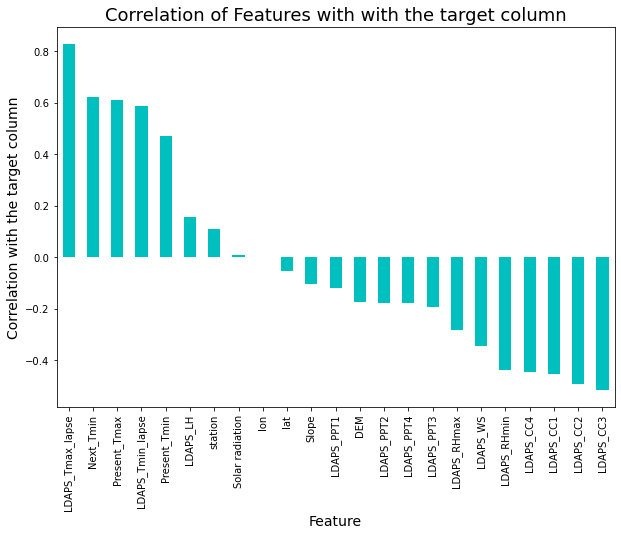

In [395]:
plt.figure(figsize=(10,7))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with with the target column',fontsize=18)
plt.show()


If we consider Next_Tmin as target column

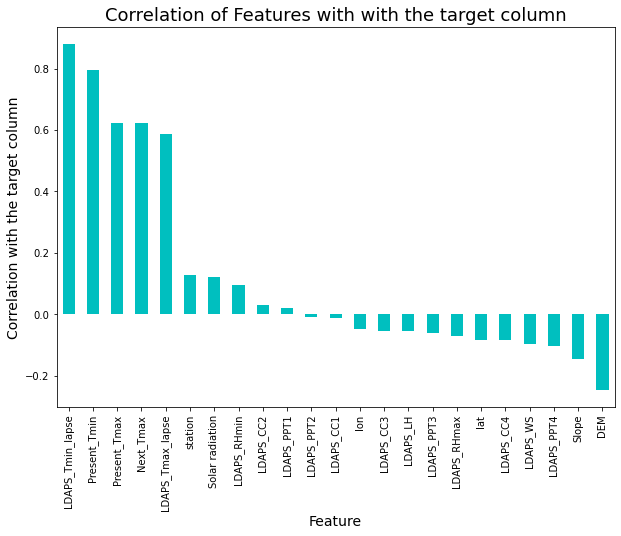

In [396]:
plt.figure(figsize=(10,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with with the target column',fontsize=18)
plt.show()

In [397]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


## Target column--> Next_Tmax

In [398]:
dfx1=df.copy()
dfx1.drop("Next_Tmax",axis=1,inplace=True)
dfx1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,18.8
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,17.4
7750,13.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,11.3


In [399]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [400]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [401]:
calc_vif(dfx1)

,variables,VIF_Factor
0,station,5.095802
1,Present_Tmax,286.831524
2,Present_Tmin,325.810510
3,LDAPS_RHmin,104.333791
4,LDAPS_RHmax,340.044699
5,LDAPS_Tmax_lapse,756.726292
6,LDAPS_Tmin_lapse,937.815277
7,LDAPS_WS,14.833645
8,LDAPS_LH,6.803142
9,LDAPS_CC1,10.506438


lat ---> 652284.000631 is having high vif hence we drop it

In [402]:
dfx1.drop(["lat"],axis=1,inplace=True)

In [403]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [404]:
calc_vif(dfx1)

,variables,VIF_Factor
0,station,4.964073
1,Present_Tmax,286.511835
2,Present_Tmin,325.712969
3,LDAPS_RHmin,102.702558
4,LDAPS_RHmax,337.759692
5,LDAPS_Tmax_lapse,754.752239
6,LDAPS_Tmin_lapse,935.408643
7,LDAPS_WS,14.773256
8,LDAPS_LH,6.802056
9,LDAPS_CC1,10.484101


LDAPS_Tmin_lapse --- 935.408643 is having high vif

In [405]:
dfx1.drop(["LDAPS_Tmin_lapse"],axis=1,inplace=True)

In [406]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [407]:
calc_vif(dfx1)

,variables,VIF_Factor
0,station,4.951280
1,Present_Tmax,272.436098
2,Present_Tmin,318.038293
3,LDAPS_RHmin,83.181320
4,LDAPS_RHmax,333.481292
5,LDAPS_Tmax_lapse,487.666444
6,LDAPS_WS,14.708403
7,LDAPS_LH,6.449927
8,LDAPS_CC1,10.365519
9,LDAPS_CC2,15.136730


lon--> 684.585065 having high vif hence we drop it

In [408]:
dfx1.drop(["lon"],axis=1,inplace=True)

In [409]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [410]:
calc_vif(dfx1)

,variables,VIF_Factor
0,station,4.845099
1,Present_Tmax,250.037978
2,Present_Tmin,317.747786
3,LDAPS_RHmin,83.061848
4,LDAPS_RHmax,195.220681
5,LDAPS_Tmax_lapse,423.419424
6,LDAPS_WS,14.105542
7,LDAPS_LH,6.308090
8,LDAPS_CC1,10.352570
9,LDAPS_CC2,15.136348


After using vif method still multicollinearity is present and vif is also very high hence we do Principal Component analysis.

# Skewnesss

In [411]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

Skewness is present for 

LDAPS_WS            1.579236
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
DEM                 1.723257
Slope               1.563020

hence we need to reduce the skewness

# Data Transformation:

We need to transform those columns which has skewness.

# Now we use subplot and displot to check data are normalised or not

In [ ]:
'station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'

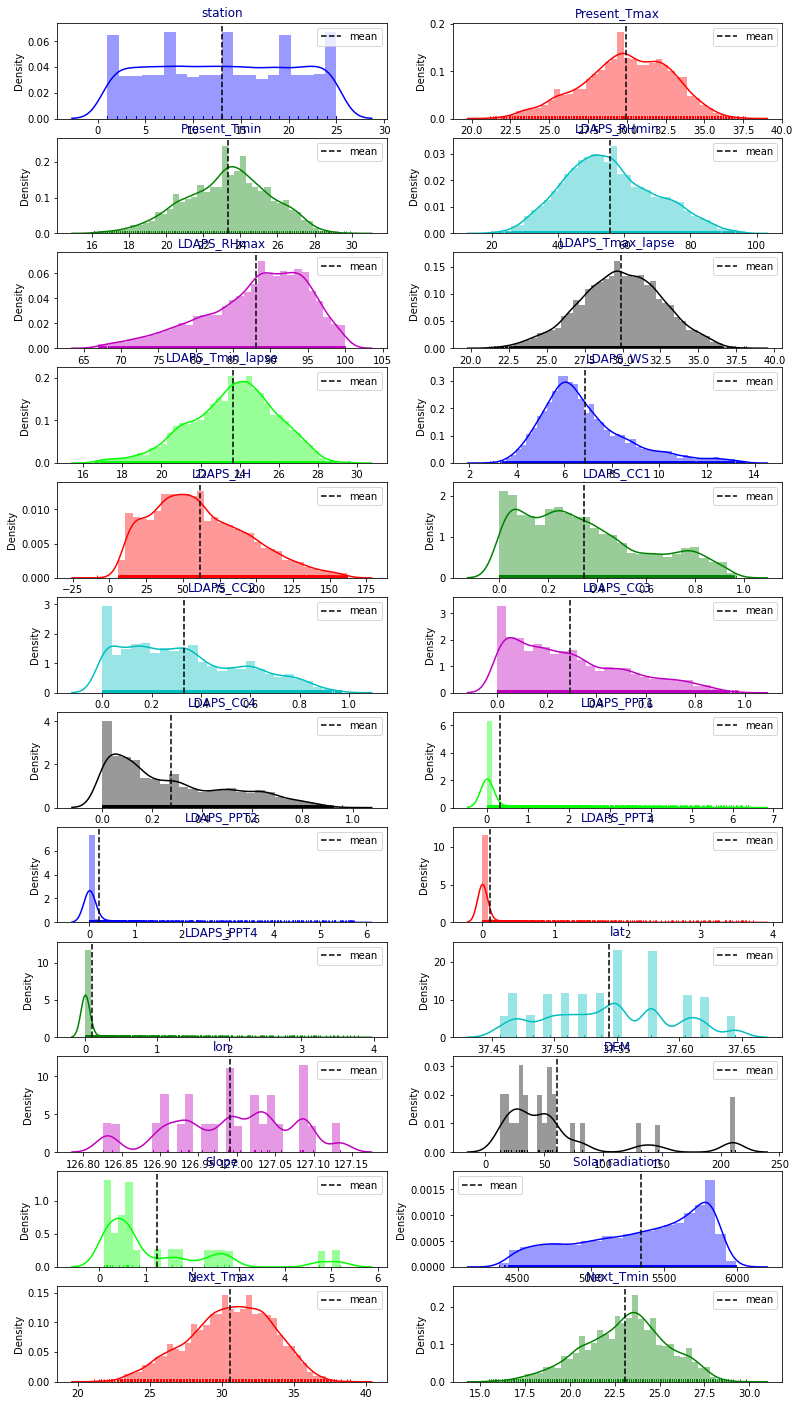

In [498]:
import itertools

cols = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","b","r","g","c","m","k","lime","b","r","g","c","m","k","lime","b","r","g"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(12,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

From the above plot it is observed that data is not normalized

## Outliers Check:

<AxesSubplot:>

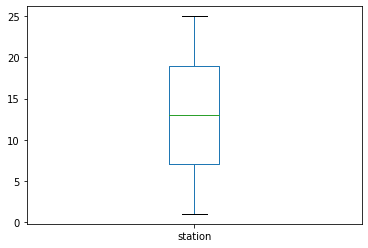

In [412]:
df['station'].plot.box()

<AxesSubplot:>

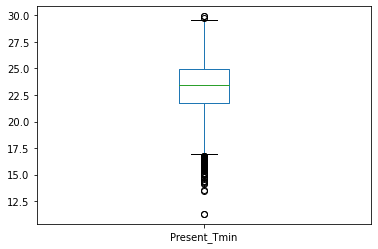

In [413]:
df['Present_Tmin'].plot.box()

<AxesSubplot:>

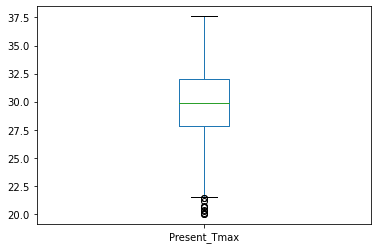

In [414]:
df['Present_Tmax'].plot.box()

<AxesSubplot:>

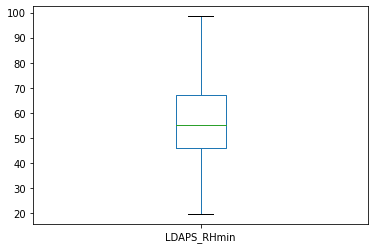

In [415]:
df['LDAPS_RHmin'].plot.box()

<AxesSubplot:>

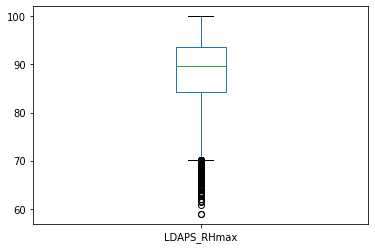

In [416]:
df['LDAPS_RHmax'].plot.box()

<AxesSubplot:>

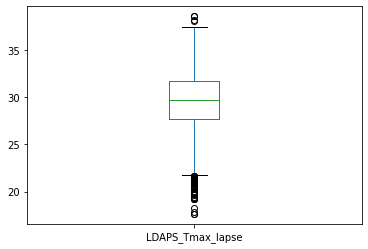

In [417]:
df['LDAPS_Tmax_lapse'].plot.box()

<AxesSubplot:>

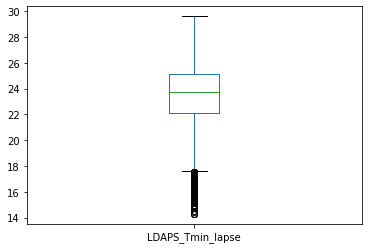

In [418]:
df['LDAPS_Tmin_lapse'].plot.box()

<AxesSubplot:>

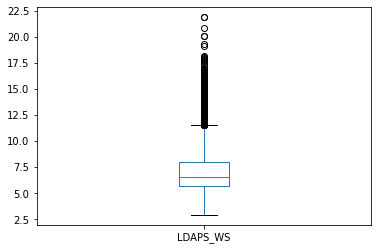

In [419]:
df['LDAPS_WS'].plot.box()

<AxesSubplot:>

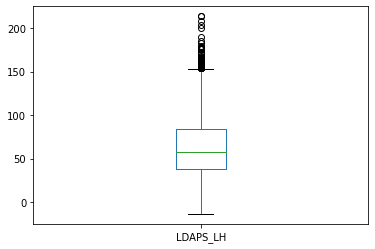

In [420]:
df['LDAPS_LH'].plot.box()

<AxesSubplot:>

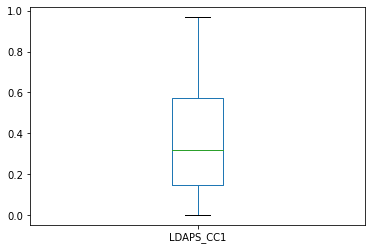

In [421]:
df['LDAPS_CC1'].plot.box()

<AxesSubplot:>

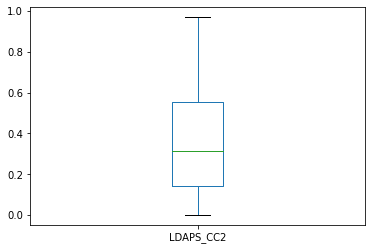

In [422]:
df['LDAPS_CC2'].plot.box()

<AxesSubplot:>

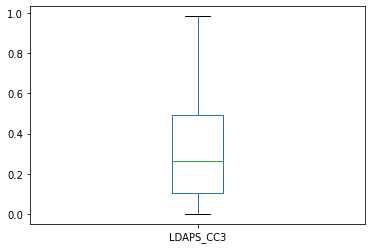

In [423]:
df['LDAPS_CC3'].plot.box()

<AxesSubplot:>

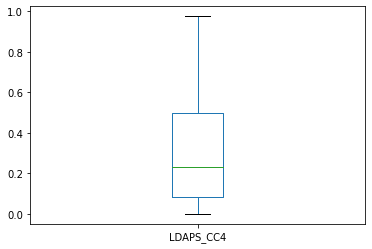

In [424]:
df['LDAPS_CC4'].plot.box()

<AxesSubplot:>

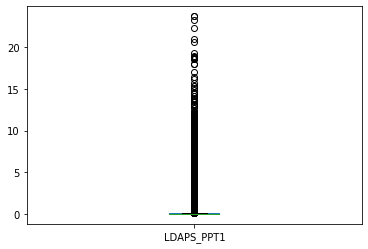

In [425]:
df['LDAPS_PPT1'].plot.box()

<AxesSubplot:>

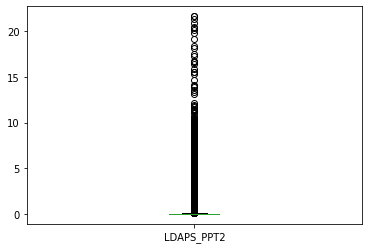

In [426]:
df['LDAPS_PPT2'].plot.box()

<AxesSubplot:>

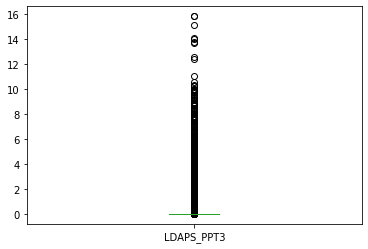

In [427]:
df['LDAPS_PPT3'].plot.box()

<AxesSubplot:>

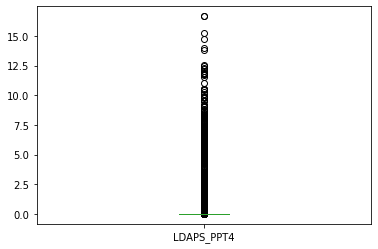

In [428]:
df['LDAPS_PPT4'].plot.box()

<AxesSubplot:>

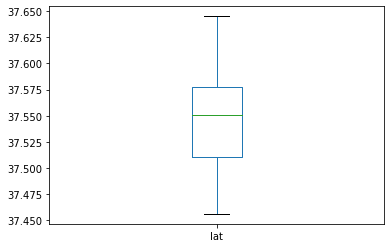

In [429]:
df['lat'].plot.box()

<AxesSubplot:>

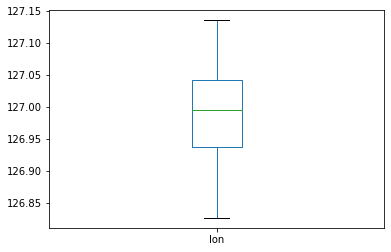

In [430]:
df['lon'].plot.box()

<AxesSubplot:>

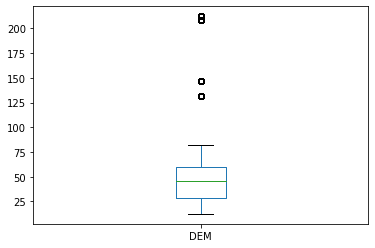

In [431]:
df['DEM'].plot.box()

<AxesSubplot:>

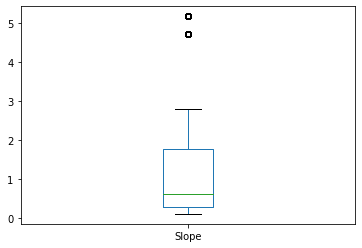

In [432]:
df['Slope'].plot.box()

<AxesSubplot:>

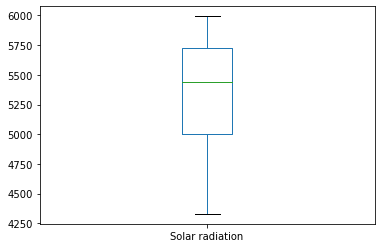

In [433]:
df['Solar radiation'].plot.box()

<AxesSubplot:>

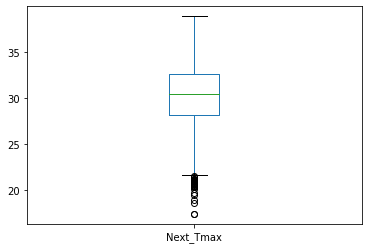

In [434]:
df['Next_Tmax'].plot.box()

<AxesSubplot:>

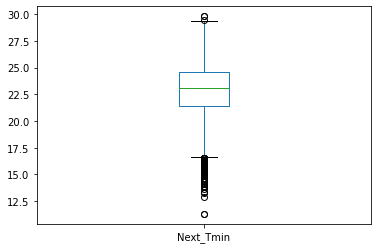

In [435]:
df['Next_Tmin'].plot.box()

from of the observation it is clear that some outliers are present. So we need this outliers.

# Check the percentage of data falls under outliers:

In [436]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64),
 array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))

In [437]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [438]:
df.shape

(7752, 24)

In [439]:
df_new.shape

(6894, 24)

# Percentage loss of data while removing outliers

In [440]:
percentage_loss=((7752-6894)/7752)*100
print(percentage_loss)

11.06811145510836


# Sparating the target and feature column

Target column--> Next_Tmax

In [441]:
df=df_new
df.shape

(6894, 24)

In [442]:
feature=df.drop("Next_Tmax",axis=1)
target=df["Next_Tmax"]
x=feature
y=target

# Removing skewness by transforming data

In [443]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [444]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)

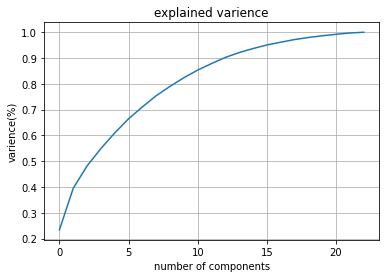

In [445]:
from sklearn.decomposition import PCA
pca=PCA()
pc=pca.fit_transform(x_t)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("varience(%)")
plt.title("explained varience")
plt.grid()
plt.show()

We can see that almost 100% of varience is explained by 20 components. So instead of giving 23 componets to our algorithm we will use these 10 componenets.

In [446]:
pca=PCA(n_components=20)
new_data=pca.fit_transform(x_t)
principal_x=pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20'])

In [447]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12,PC-13,PC-14,PC-15,PC-16,PC-17,PC-18,PC-19,PC-20
0,0.014335,2.573629,-2.381017,-0.154672,-0.784925,0.875806,0.136649,-1.674654,0.223224,-0.520228,0.648102,0.275277,0.155100,0.208001,-0.115454,0.488905,-0.194300,-0.276593,0.285405,-0.156092
1,-0.855550,0.844069,-1.027797,0.370839,0.602098,1.713540,-0.117554,-1.248868,0.164832,-0.760918,0.596277,0.389735,0.069248,-0.028757,0.082758,0.868573,0.548386,0.158608,-0.047750,-0.331075
2,-1.203814,-0.275677,-0.047915,-0.057323,0.016847,2.293383,-0.744458,-0.864868,0.551556,-0.900228,0.475261,0.528178,-0.245344,0.062584,0.488411,0.913412,0.017166,0.007572,-0.071610,-0.219395
3,-0.478942,0.697647,-2.510310,0.487644,0.639498,1.264122,0.456988,-1.315780,-0.197641,0.430224,0.993173,-0.199015,0.264958,-0.129102,0.400378,0.700929,-0.113600,0.515683,-0.795171,-0.250682
4,-0.812187,0.942708,-0.951237,0.327609,1.195537,1.165770,-0.152337,-1.175706,-1.107756,-0.604380,-0.904905,1.160905,-0.541221,-0.066651,0.243330,0.570282,0.156000,-0.209592,-0.344054,-0.275977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,-2.694614,4.459337,3.036531,0.071146,-0.242087,0.408994,-1.630749,2.317326,0.863775,0.853878,0.680180,-0.130943,-0.263749,-0.275505,0.254988,-0.073188,-0.252438,-0.135846,-0.353654,-0.051651
6890,-2.386774,4.711744,3.055655,1.088575,1.356818,-0.509088,-0.859355,1.748336,-0.400466,0.484988,-0.867286,0.544274,-0.801203,-0.280922,-0.111617,-0.384026,-0.169722,-0.520774,0.068665,-0.062804
6891,-2.625209,4.165571,3.899583,1.393199,0.815596,-1.205070,-0.333433,0.976395,0.700255,0.716305,0.412548,0.246497,0.230983,-0.045603,-0.745519,-0.256515,-0.065822,-0.499449,-0.281279,-0.000923
6892,-2.804014,3.922224,3.931588,1.042853,0.211969,-1.040857,-0.732508,1.341317,0.802406,0.684464,0.461755,0.136992,0.085174,-0.106309,-0.527542,-0.273422,-0.176898,-0.286639,-0.377309,0.014262


# Regressor Model Building:

## Linear Regression:

In [448]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [449]:
principal_x.shape

(6894, 20)

In [450]:
y.shape

(6894,)

In [451]:
#max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(principal_x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)

At random state 300  The model performs very well
At random_state:- 300
Training r2_score is:- 74.93402323853472
Testing r2_score is:- 74.9277158494989
At random state 891  The model performs very well
At random_state:- 891
Training r2_score is:- 74.91674678807571
Testing r2_score is:- 74.9178333794254
At random state 944  The model performs very well
At random_state:- 944
Training r2_score is:- 74.93247467363159
Testing r2_score is:- 74.93482934721622


In [452]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(principal_x,y,random_state=944,test_size=0.20)

In [453]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [454]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('Error:')

print("mean absolute error:",mean_absolute_error(pred_test,y_test))  # no change if we interchange pred and y_test values
print("mean squared error:",mean_squared_error(pred_test,y_test))
print("root mean squared error:",np.sqrt(mean_squared_error(pred_test,y_test)))


Error:
mean absolute error: 1.1424727918990458
mean squared error: 2.168626379838894
root mean squared error: 1.4726256753971438


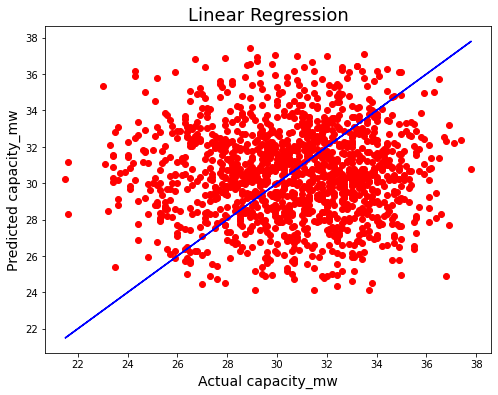

In [455]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_test, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw',fontsize=14)
plt.ylabel('Predicted capacity_mw',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

## 1. Lasso:

In [456]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [457]:
ls = Lasso(alpha=0.001,random_state=0)
ls.fit(x_train_b,y_train_b)
ls.score(x_train_b,y_train_b)
pred_ls = ls.predict(x_test_b)

lss = r2_score(y_test_b,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,principal_x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 66.37123069616231
R2_score is :- 74.9288615858945


At cv:- 3
Cross validation score is:- 69.28446784139327
R2_score is :- 74.9288615858945


At cv:- 4
Cross validation score is:- 68.40243931919538
R2_score is :- 74.9288615858945


At cv:- 5
Cross validation score is:- 67.78079250209007
R2_score is :- 74.9288615858945


At cv:- 6
Cross validation score is:- 67.45068581281451
R2_score is :- 74.9288615858945


At cv:- 7
Cross validation score is:- 67.57843741920136
R2_score is :- 74.9288615858945


At cv:- 8
Cross validation score is:- 66.93513204558843
R2_score is :- 74.9288615858945


At cv:- 9
Cross validation score is:- 61.54727150914581
R2_score is :- 74.9288615858945




In [458]:
print("At cv:-",3)
print("Cross validation score is:-",69.284 )
print("R2_score is :-",74.928)

At cv:- 3
Cross validation score is:- 69.284
R2_score is :- 74.928


In [459]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_ls)))

Error:
Mean Absolute Error: 1.1090149488841472
Mean Squared Error: 2.131726812175711
Root Mean Square Error: 1.4600434281814056


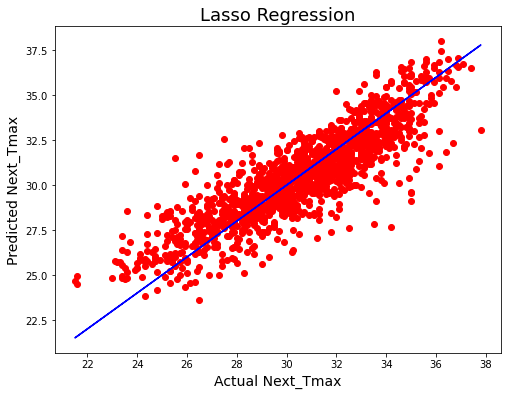

In [460]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_ls, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Next_Tmax',fontsize=14)
plt.ylabel('Predicted Next_Tmax',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge Regression

In [461]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [462]:
rd = Ridge(alpha=0.001, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(x_train_b,y_train_b)
rd.score(x_train_b,y_train_b)
pred_rd = rd.predict(x_test_b)

rds = r2_score(y_test_b,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,principal_x,y,cv=5)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 74.93806665629994
Cross Val Score: 67.75996620382969


In [463]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_rd)))

Error:
Mean Absolute Error: 1.1088073238526415
Mean Squared Error: 2.1309441315065225
Root Mean Square Error: 1.4597753702219127


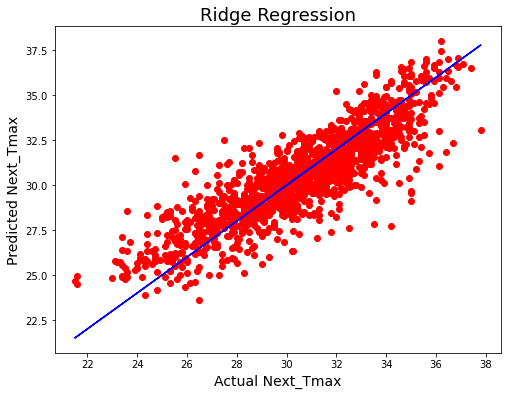

In [464]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_rd, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Next_Tmax',fontsize=14)
plt.ylabel('Predicted Next_Tmax',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Ensemble Techniques:

In [465]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'mae', 'splitter': 'best'}


In [469]:
dt = DecisionTreeRegressor(criterion='mae', splitter='best')
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
pred_decision = dt.predict(x_test_b)

dts = r2_score(y_test_b,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,principal_x,y,cv=3)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 54.50060749585083
Cross Val Score: 20.329586234103225


In [470]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_decision)))

Error:
Mean Absolute Error: 1.4209211214918178
Mean Squared Error: 3.868682519986075
Root Mean Square Error: 1.9668966724223402


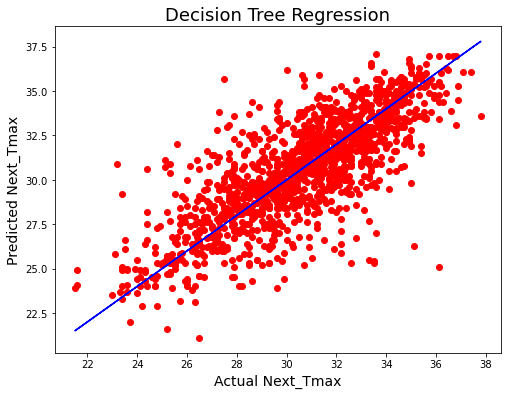

In [471]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_decision, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Next_Tmax',fontsize=14)
plt.ylabel('Predicted Next_Tmax',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse', 'mae'],'n_estimators':[100,200,300]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

In [ ]:
rf = RandomForestRegressor(criterion='mae',n_estimators=300)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b, y_train_b)
pred_random = rf.predict(x_test_b)

rfs = r2_score(y_test_b,pred_random)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,principal_x,y,cv=3)
rfc = rfscore.mean() 
print('Cross Val Score:',rfc*100)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Next_Tmax',fontsize=14)
plt.ylabel('Predicted Next_Tmax',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

In [474]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'loss': 'ls', 'n_estimators': 200}


In [476]:
gbr= GradientBoostingRegressor(criterion='friedman_mse',loss='ls',n_estimators=200)
gbr.fit(x_train_b, y_train_b)
gbr.score(x_train_b, y_train_b)
pred_random = gbr.predict(x_test_b)

gbrs= r2_score(y_test_b,pred_random)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,principal_x,y,cv=3)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

R2 Score: 80.75930667315023
Cross Val Score: 68.00361931084149


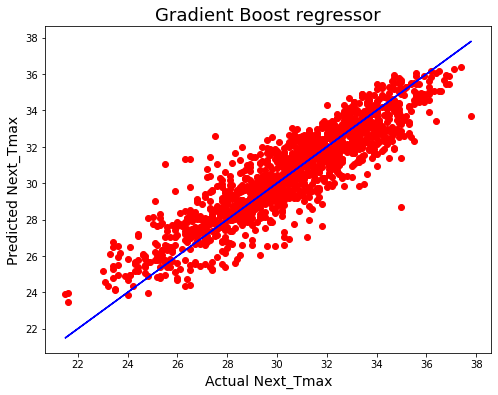

In [477]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Next_Tmax',fontsize=14)
plt.ylabel('Predicted Next_Tmax',fontsize=14)
plt.title('Gradient Boost regressor',fontsize=18)
plt.show()

In [482]:
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(x_train_b, y_train_b)
xgb.score(x_train_b, y_train_b)
pred_random = xgb.predict(x_test_b)

xgbs= r2_score(y_test_b,pred_random)
print('R2 Score:',xgbs*100)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
xgbscore = cross_val_score(xgb,principal_x,y,cv=5)
xgbc= xgbscore.mean() 
print('Cross Val Score:',xgbc*100)




R2 Score: 86.30191531951603
Cross Val Score: 65.50029917110089


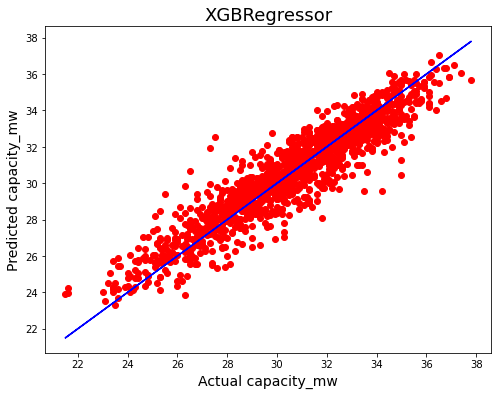

In [483]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw',fontsize=14)
plt.ylabel('Predicted capacity_mw',fontsize=14)
plt.title('XGBRegressor',fontsize=18)
plt.show()

In [481]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train_b,y_train_b)
print("KNR score:",knr.score(x_train_b,y_train_b))

knr_pred=knr.predict(x_test_b)
knrs= r2_score(y_test_b,knr_pred)
print('R2 Score:',knrs*100)
knrscore = cross_val_score(knr,principal_x,y,cv=5)
knrc= knrscore.mean() 
print('Cross Val Score:',knrc*100)


KNR score: 0.9285090988500809
R2 Score: 80.14849026925116
Cross Val Score: 49.8381550934306


In [484]:
print("Mean Squared error:",mean_squared_error(y_test_b,knr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test_b,knr_pred)))

Mean Squared error: 1.6879167932556034
Root Mean Squared error: 1.2991985195710483


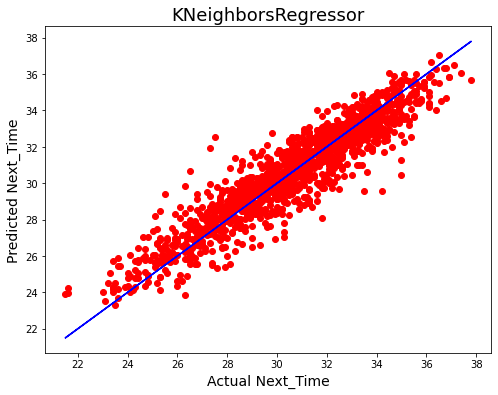

In [485]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Next_Time',fontsize=14)
plt.ylabel('Predicted Next_Time',fontsize=14)
plt.title('KNeighborsRegressor',fontsize=18)
plt.show()

In [486]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train_b,y_train_b)
print("SVR score:",svr.score(x_train_b,y_train_b))

svr_pred=svr.predict(x_test_b)
svrs= r2_score(y_test_b,svr_pred)
print('R2 Score:',svrs*100)
svrscore = cross_val_score(svr,principal_x,y,cv=5)
svrc= svrscore.mean() 
print('Cross Val Score:',svrc*100)

SVR score: 0.8783027067447331
R2 Score: 85.96820858159651
Cross Val Score: 65.86864594521784


In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
parameters = {'n_estimators':[50,100,200],'learning_rate':[0.1,1.0,1.5],'loss' : ['linear', 'quare', 'exponential'],'random_state':[0,1,2,3,4,5,6,7,8,9]}

#parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
abr=AdaBoostRegressor()
clf = GridSearchCV(abr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

In [488]:
abr= AdaBoostRegressor(learning_rate= 0.1, loss= 'exponential', n_estimators= 50, random_state= 2)
abr.fit(x_train_b, y_train_b)
abr.score(x_train_b, y_train_b)
pred_random = abr.predict(x_test_b)

abrs= r2_score(y_test_b,pred_random)
print('R2 Score:',abrs*100)

abscore = cross_val_score(abr,principal_x,y,cv=5)
abrc= abscore.mean() 
print('Cross Val Score:',abrc*100)

R2 Score: 60.46434210624215
Cross Val Score: 51.754713439547274


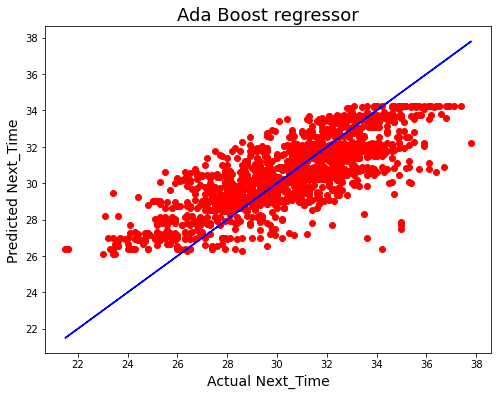

In [489]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Next_Time',fontsize=14)
plt.ylabel('Predicted Next_Time',fontsize=14)
plt.title('Ada Boost regressor',fontsize=18)
plt.show()

In [490]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid']} #'gamma': ['auto', 'scale']
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'kernel': 'rbf'}


In [491]:
sv = SVR(kernel = 'rbf', gamma = 'auto')
sv.fit(x_train_b, y_train_b)
sv.score(x_train_b, y_train_b)
pred_vector = sv.predict(x_test_b)

svs = r2_score(y_test_b,pred_vector)
print('R2 Score:',svs*100)

svscore = cross_val_score(sv,principal_x,y,cv=5)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: 86.47439229848982
Cross Val Score: 65.64234142990483


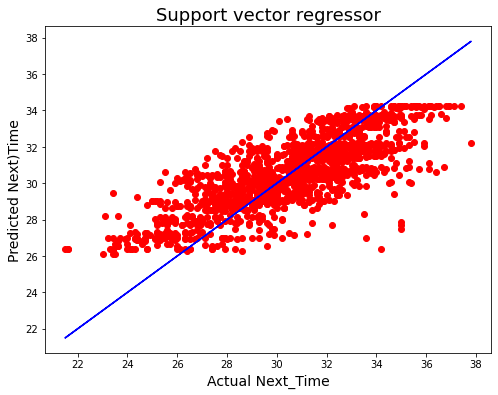

In [493]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Next_Time',fontsize=14)
plt.ylabel('Predicted Next)Time',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()

# The best model is Lasso. Since the difference between the percentage score of cross validation and r2_score is optimum.

Cross validation score is:- 69.284
R2_score is :- 74.928

# Model Saving

In [494]:
import pickle
filename = 'ls_next_tmax_in.pkl'
pickle.dump(ls,open(filename, 'wb'))

# Conclusion

In [495]:
a=np.array(y_test)
a

array([29.6, 32.2, 29.2, ..., 28. , 30.5, 26.4])

In [496]:
predicted=np.array(ls.predict(x_test))
predicted

array([30.31706566, 31.82652081, 26.96632434, ..., 30.22266869,
       31.5305706 , 27.10509531])

In [497]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,29.6,30.317066
1,32.2,31.826521
2,29.2,26.966324
3,32.6,31.343208
4,25.5,29.333146
...,...,...
1374,34.4,35.547002
1375,31.9,33.162499
1376,28.0,30.222669
1377,30.5,31.530571


# From the above table the model is predicted the values with 70 percent accuracy

# Target column--> Next_Tmin

In [499]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# Sparating the target and feature column

In [500]:
feature=df.drop("Next_Tmin",axis=1)
target=df["Next_Tmin"]
x=feature
y=target

# Removing skewness by transforming data

In [501]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [502]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)

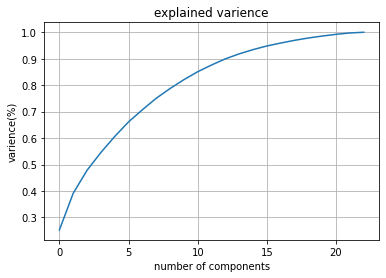

In [503]:
from sklearn.decomposition import PCA
pca=PCA()
pc=pca.fit_transform(x_t)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("varience(%)")
plt.title("explained varience")
plt.grid()
plt.show()

In [504]:
pca=PCA(n_components=20)
new_data=pca.fit_transform(x_t)
principal_x=pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20'])

In [505]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12,PC-13,PC-14,PC-15,PC-16,PC-17,PC-18,PC-19,PC-20
0,0.176430,2.678093,-2.131666,-0.179536,-0.822278,-0.885247,0.006422,1.707344,-0.253998,-0.501607,0.539991,0.334819,0.168514,0.250407,-0.004660,-0.538119,-0.201018,-0.287279,-0.332947,0.201864
1,-0.801760,0.919797,-0.909689,0.375639,0.527858,-1.754011,-0.204054,1.274140,-0.164958,-0.731461,0.456907,0.463306,0.095403,0.024632,0.216507,-0.868819,0.410768,0.372974,-0.359037,-0.065255
2,-1.158835,-0.060720,0.101826,-0.076306,-0.036226,-2.306663,-0.813918,0.821618,-0.477588,-0.945326,0.367613,0.632609,-0.155288,0.114707,0.567875,-0.875805,0.103100,0.050718,0.059719,0.079341
3,-0.520801,1.092583,-2.345411,0.494808,0.571205,-1.307136,0.325182,1.361914,0.160159,0.404316,0.989148,-0.132781,0.265558,-0.050267,0.521566,-0.714337,-0.161120,0.567611,0.337341,-0.533114
4,-0.834980,0.935215,-0.921103,0.350464,1.147808,-1.190136,-0.253048,1.199504,0.980637,-0.337361,-1.130569,1.218055,-0.384865,-0.070351,0.257543,-0.534924,0.261380,-0.124936,-0.003583,-0.356627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,-2.237512,4.053933,3.354766,-0.007374,-0.043910,-0.277947,-1.570383,-2.574105,-0.615623,0.519309,0.884826,-0.050520,-0.116085,-0.258272,0.265765,0.031907,-0.195604,-0.111371,0.065053,-0.213926
6890,-2.006774,4.136563,3.231349,1.051754,1.569575,0.634615,-0.864964,-1.929095,0.504388,0.436474,-0.809150,0.607203,-0.570255,-0.331454,-0.174230,0.335046,-0.057815,-0.496720,-0.137122,0.117310
6891,-2.237892,3.678003,4.105971,1.333282,1.089046,1.371955,-0.430466,-1.146467,-0.528105,0.461319,0.577863,0.228405,0.431235,-0.103456,-0.772635,0.099356,-0.036355,-0.345133,-0.195541,-0.116966
6892,-2.418514,3.529949,4.177144,0.968407,0.489086,1.219803,-0.800584,-1.548682,-0.581247,0.384670,0.648535,0.149824,0.301805,-0.151784,-0.559302,0.131420,-0.142132,-0.169979,0.004254,-0.091659


# Regressor Model Building:

In [507]:
max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(principal_x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)

At random state 13  The model performs very well
At random_state:- 13
Training r2_score is:- 82.6029398941429
Testing r2_score is:- 82.60408519839042
At random state 161  The model performs very well
At random_state:- 161
Training r2_score is:- 82.60452635856733
Testing r2_score is:- 82.59599290860315
At random state 170  The model performs very well
At random_state:- 170
Training r2_score is:- 82.60955052403321
Testing r2_score is:- 82.61499120966083
At random state 259  The model performs very well
At random_state:- 259
Training r2_score is:- 82.60865738401606
Testing r2_score is:- 82.6108320093295
At random state 310  The model performs very well
At random_state:- 310
Training r2_score is:- 82.60181516184447
Testing r2_score is:- 82.59888586456086
At random state 327  The model performs very well
At random_state:- 327
Training r2_score is:- 82.6110773539319
Testing r2_score is:- 82.60771587162873
At random state 672  The model performs very well
At random_state:- 672
Training r2_sco

In [509]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(principal_x,y,random_state=13,test_size=0.20)

In [510]:
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
print("Testing r2_score is:-", r2_score(y_test,pred_test)*100) 

Training r2_score is:- 82.97421286603725
Testing r2_score is:- 81.14560898178907


In [511]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('Error:')

print("mean absolute error:",mean_absolute_error(pred_test,y_test))  # no change if we interchange pred and y_test values
print("mean squared error:",mean_squared_error(pred_test,y_test))
print("root mean squared error:",np.sqrt(mean_squared_error(pred_test,y_test)))


Error:
mean absolute error: 0.8017219157795316
mean squared error: 1.0546291145021953
root mean squared error: 1.026951369102839


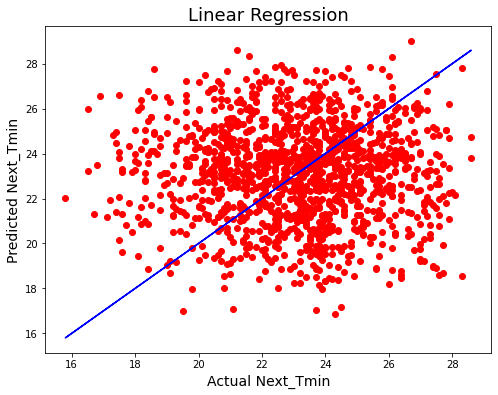

In [512]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_test, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Next_Tmin',fontsize=14)
plt.ylabel('Predicted Next_Tmin',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

# 1. Lasso

In [513]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [514]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train_b,y_train_b)
ls.score(x_train_b,y_train_b)
pred_ls = ls.predict(x_test_b)

lss = r2_score(y_test_b,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,principal_x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 80.27943382677229
R2_score is :- 82.60467929564945


At cv:- 3
Cross validation score is:- 77.03606066976883
R2_score is :- 82.60467929564945


At cv:- 4
Cross validation score is:- 78.78357731281088
R2_score is :- 82.60467929564945


At cv:- 5
Cross validation score is:- 77.65121793352044
R2_score is :- 82.60467929564945


At cv:- 6
Cross validation score is:- 75.2312308954624
R2_score is :- 82.60467929564945


At cv:- 7
Cross validation score is:- 76.17685178923578
R2_score is :- 82.60467929564945


At cv:- 8
Cross validation score is:- 77.46679220532485
R2_score is :- 82.60467929564945


At cv:- 9
Cross validation score is:- 69.83402057621517
R2_score is :- 82.60467929564945




In [515]:
print("At cv:-",2)
print("Cross validation score is:-",80.279 )
print("R2_score is :-",82.604)

At cv:- 2
Cross validation score is:- 80.279
R2_score is :- 82.604


In [516]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_ls)))

Error:
Mean Absolute Error: 0.7571586396461112
Mean Squared Error: 0.9447656784441588
Root Mean Square Error: 0.9719905752856655


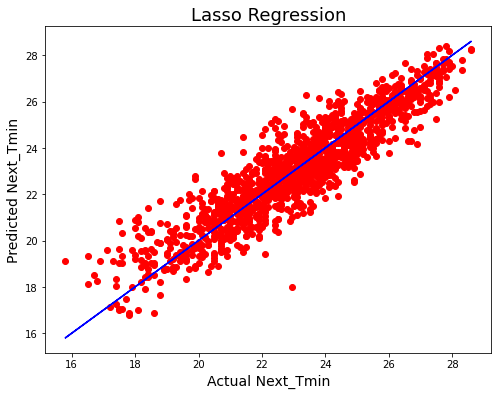

In [519]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_ls, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Next_Tmin',fontsize=14)
plt.ylabel('Predicted Next_Tmin',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge Regression

In [520]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [521]:
rd = Ridge(alpha=0.001, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(x_train_b,y_train_b)
rd.score(x_train_b,y_train_b)
pred_rd = rd.predict(x_test_b)

rds = r2_score(y_test_b,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,principal_x,y,cv=5)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 82.60893600808284
Cross Val Score: 77.65179630086409


In [522]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_rd)))

Error:
Mean Absolute Error: 0.7570894721047443
Mean Squared Error: 0.9445344900758366
Root Mean Square Error: 0.9718716427984905


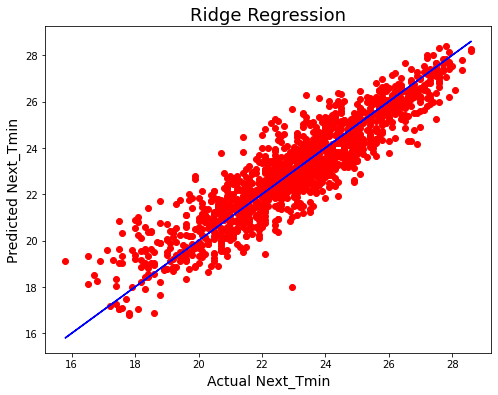

In [523]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_rd, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Next_Tmin',fontsize=14)
plt.ylabel('Predicted Next_Tmin',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Ensemble Techniques:

In [524]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'mse', 'splitter': 'best'}


In [525]:
dt = DecisionTreeRegressor(criterion='mse', splitter='best')
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
pred_decision = dt.predict(x_test_b)

dts = r2_score(y_test_b,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,principal_x,y,cv=5)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 69.20687773672334
Cross Val Score: 51.302095136478144


In [526]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_decision)))

Error:
Mean Absolute Error: 0.9865119651921684
Mean Squared Error: 1.6724201606241458
Root Mean Square Error: 1.2932208475833298


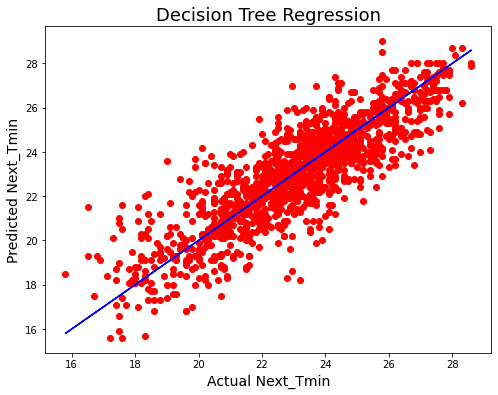

In [527]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_decision, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Next_Tmin',fontsize=14)
plt.ylabel('Predicted Next_Tmin',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

In [530]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(criterion='friedman_mse',loss='ls',n_estimators=200)
gbr.fit(x_train_b, y_train_b)
gbr.score(x_train_b, y_train_b)
pred_random = gbr.predict(x_test_b)

gbrs= r2_score(y_test_b,pred_random)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,principal_x,y,cv=5)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

R2 Score: 85.55157549829805
Cross Val Score: 77.04392122170184


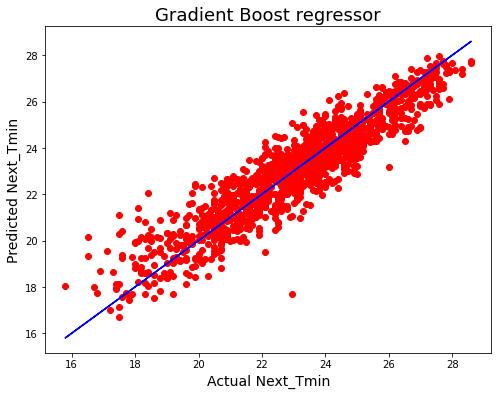

In [531]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Next_Tmin',fontsize=14)
plt.ylabel('Predicted Next_Tmin',fontsize=14)
plt.title('Gradient Boost regressor',fontsize=18)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse', 'mae'],'n_estimators':[100,200,300]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

In [ ]:
rf = RandomForestRegressor(criterion='mae',n_estimators=300)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b, y_train_b)
pred_random = rf.predict(x_test_b)

rfs = r2_score(y_test_b,pred_random)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,principal_x,y,cv=3)
rfc = rfscore.mean() 
print('Cross Val Score:',rfc*100)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Next_Tmin',fontsize=14)
plt.ylabel('Predicted Next_Tmin',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

In [534]:
xgb = XGBRegressor()
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(x_train_b, y_train_b)
xgb.score(x_train_b, y_train_b)
pred_random = xgb.predict(x_test_b)

xgbs= r2_score(y_test_b,pred_random)
print('R2 Score:',xgbs*100)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
xgbscore = cross_val_score(xgb,principal_x,y,cv=5)
xgbc= xgbscore.mean() 
print('Cross Val Score:',xgbc*100)

R2 Score: 88.93676388167825
Cross Val Score: 75.99363424026758


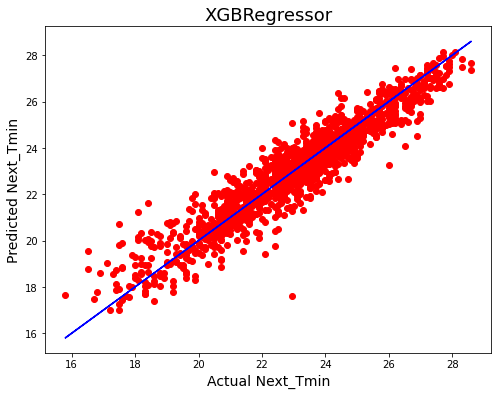

In [535]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Next_Tmin',fontsize=14)
plt.ylabel('Predicted Next_Tmin',fontsize=14)
plt.title('XGBRegressor',fontsize=18)
plt.show()

In [536]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train_b,y_train_b)
print("KNR score:",knr.score(x_train_b,y_train_b))

knr_pred=knr.predict(x_test_b)
knrs= r2_score(y_test_b,knr_pred)
print('R2 Score:',knrs*100)
knrscore = cross_val_score(knr,principal_x,y,cv=5)
knrc= knrscore.mean() 
print('Cross Val Score:',knrc*100)


KNR score: 0.9443689482857734
R2 Score: 82.20243618798229
Cross Val Score: 54.760324142922414


In [537]:
print("Mean Squared error:",mean_squared_error(y_test_b,knr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test_b,knr_pred)))

Mean Squared error: 0.9666120984655845
Root Mean Squared error: 0.9831643293293265


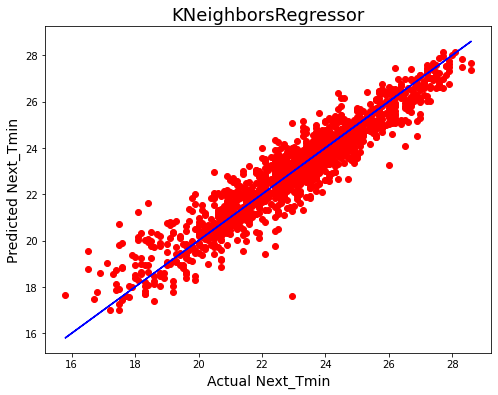

In [538]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Next_Tmin',fontsize=14)
plt.ylabel('Predicted Next_Tmin',fontsize=14)
plt.title('KNeighborsRegressor',fontsize=18)
plt.show()

In [540]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train_b,y_train_b)
print("SVR score:",svr.score(x_train_b,y_train_b))

svr_pred=svr.predict(x_test_b)
svrs= r2_score(y_test_b,svr_pred)
print('R2 Score:',svrs*100)
svrscore = cross_val_score(svr,principal_x,y,cv=5)
svrc= svrscore.mean() 
print('Cross Val Score:',svrc*100)

SVR score: 0.9280629124008428
R2 Score: 89.46620868933299
Cross Val Score: 75.32589297782349


In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
parameters = {'n_estimators':[50,100,200],'learning_rate':[0.1,1.0,1.5],'loss' : ['linear', 'quare', 'exponential'],'random_state':[0,1,2,3,4,5,6,7,8,9]}

#parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
abr=AdaBoostRegressor()
clf = GridSearchCV(abr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

In [541]:
abr= AdaBoostRegressor(learning_rate= 0.1, loss= 'exponential', n_estimators= 50, random_state= 2)
abr.fit(x_train_b, y_train_b)
abr.score(x_train_b, y_train_b)
pred_random = abr.predict(x_test_b)

abrs= r2_score(y_test_b,pred_random)
print('R2 Score:',abrs*100)

abscore = cross_val_score(abr,x,y,cv=5)
abrc= abscore.mean() 
print('Cross Val Score:',abrc*100)

R2 Score: 72.87760402670634
Cross Val Score: 71.8576596892957


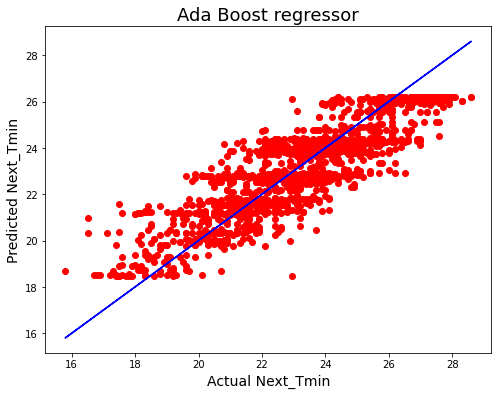

In [542]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Next_Tmin',fontsize=14)
plt.ylabel('Predicted Next_Tmin',fontsize=14)
plt.title('Ada Boost regressor',fontsize=18)
plt.show()

In [ ]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid']} #'gamma': ['auto', 'scale']
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

In [545]:
sv = SVR(kernel = 'rbf', gamma = 'auto')
sv.fit(x_train_b, y_train_b)
sv.score(x_train_b, y_train_b)
pred_vector = sv.predict(x_test_b)

svs = r2_score(y_test_b,pred_vector)
print('R2 Score:',svs*100)

svscore = cross_val_score(sv,principal_x,y,cv=5)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: 89.74146178431035
Cross Val Score: 74.9679973531548


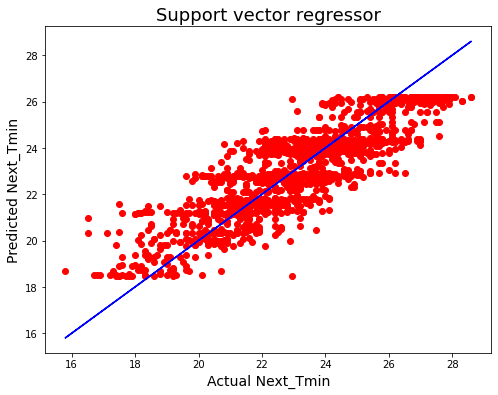

In [546]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Next_Tmin',fontsize=14)
plt.ylabel('Predicted Next_Tmin',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()

# The best model is Lasso.
Since the difference between the percentage score of cross validation and r2_score is optimum.

Cross validation score is:- 80.279
R2_score is :- 82.604

# Model Saving

In [547]:
import pickle
filename = 'ls_next_tmin_in.pkl'
pickle.dump(xgb,open(filename, 'wb'))

# Conclusion

In [548]:
a=np.array(y_test)
a

array([23.3, 21.2, 18.6, ..., 21.9, 22.5, 23. ])

In [549]:
predicted=np.array(ls.predict(x_test))
predicted

array([22.73506221, 21.78510505, 19.48591252, ..., 21.65625103,
       23.50297608, 22.09533351])

In [550]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,23.3,22.735062
1,21.2,21.785105
2,18.6,19.485913
3,24.6,24.781135
4,23.0,23.273821
...,...,...
1374,26.2,26.064748
1375,26.9,26.412756
1376,21.9,21.656251
1377,22.5,23.502976


# From the above table the model is predicted the values with 80 percent accuracy